In [12]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
import sklearn.metrics
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline

### Challenge 1

In [2]:
def change_vals(char):
    if char == 'y':
        return 1
    elif char == 'n':
        return 0

func = [change_vals for i in range(18)]
converter = dict(zip(range(1,18), func))

columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', \
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', \
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', \
           'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', \
           'superfund-right-to-sue', 'crime, duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv('votes.csv', index_col=False, names=columns, converters=converter)

means = [df[columns[i]].mean() for i in range(1,len(df.columns))]
column_means_dict = dict(zip(df.columns[1:], means))
df = df.fillna(column_means_dict, inplace=True)
# Alternatively use df = df.fillna(df.mean())

### Challenge 2

In [4]:
# Using cross_validation to split into training and test
train, test = train_test_split(df)

### Challenge 3

In [5]:
X_train = train[:,1:]
y_train = train[:,0]
X_test = test[:,1:]
y_test = test[:,0]

scores = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))     
    #y_pred = knn.predict(X_test)
    #accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    #scores.append(accuracy)
    
best_k = scores.index(max(scores)) + 1
print 'Best k = ' + str(best_k)

Best k = 6


### Challenge 4

In [6]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
log_score = logistic_model.score(X_test, y_test)
print 'Logistic Regression Accuracy: {0:.2f}'.format(log_score)

Logistic Regression Accuracy: 0.95


### Challenge 5

democrat      267
republican    168
dtype: int64
Predicting all democrat accuracy: 0.61
Predicting all republican accuracy: 0.39


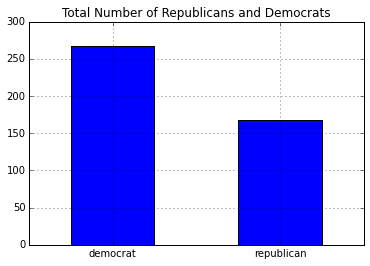

In [9]:
df['Class Name'].value_counts().plot(kind='bar', rot=0, title='Total Number of Republicans and Democrats')

print df['Class Name'].value_counts()

def make_demo(X):
    return ['democrat'] * len(df)

def make_rep(X):
    return ['republican'] * len(df)

X = df.values[:,1:]
y_actual = df.values[:,0]
y_pred_alldem = make_demo(X)
y_pred_allrep = make_rep(X)
all_dem = sklearn.metrics.accuracy_score(y_actual, y_pred_alldem)
all_rep = sklearn.metrics.accuracy_score(y_actual, y_pred_allrep)
print 'Predicting all democrat accuracy: {0:.2f}'.format(all_dem)
print 'Predicting all republican accuracy: {0:.2f}'.format(all_rep)

### Challenge 6

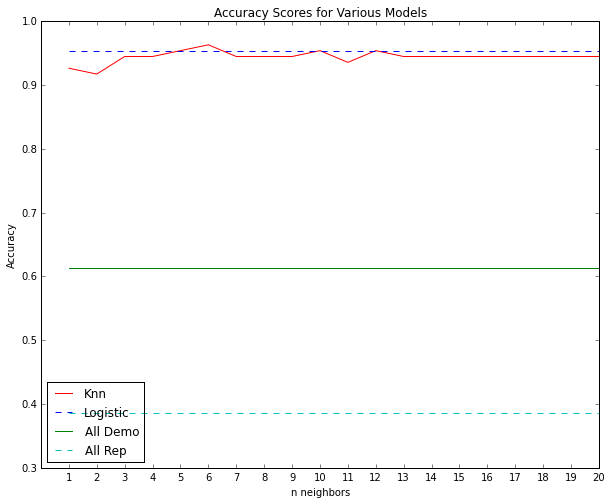

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21), scores, 'r-', label='Knn')
plt.plot(range(1,21), [log_score] * 20, 'b--', label='Logistic')
plt.plot(range(1,21), [all_dem] * 20, 'g-', label='All Demo')
plt.plot(range(1,21), [all_rep] * 20, 'c--', label='All Rep')
plt.xticks(np.arange(1,21));
plt.xlabel('n neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Various Models')
plt.legend(loc='best');

### Challenge 7

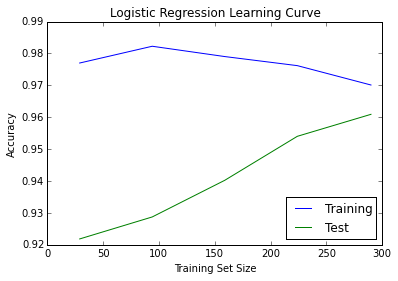

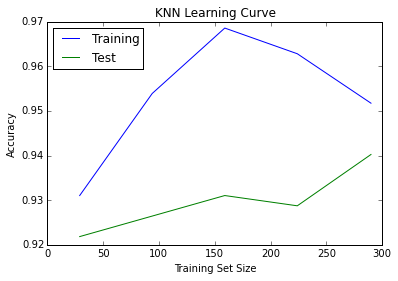

In [15]:
# Logistic Regression
log_model = LogisticRegression()
m, train_err, test_err = sklearn.learning_curve.learning_curve(log_model, X, y_actual)

train_cv_error = np.mean(train_err, axis=1)
test_cv_error = np.mean(test_err, axis=1)

plt.figure()
plt.plot(m, train_cv_error, label='Training') 
plt.plot(m, test_cv_error, label='Test')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Learning Curve')
plt.legend(loc='best')

# K Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=6)

knn_m, knn_train_err, knn_test_err = sklearn.learning_curve.learning_curve(knn_model, X, y_actual)

knn_train_cv_error = np.mean(knn_train_err, axis=1)
knn_test_cv_error = np.mean(knn_test_err, axis=1)

plt.figure()
plt.plot(knn_m, knn_train_cv_error, label='Training')
plt.plot(knn_m, knn_test_cv_error, label='Test')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('KNN Learning Curve')
plt.legend(loc='best')

### Challenge 8

In [16]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_acc = gnb.score(X_test, y_test)
print 'Gaussian Naive Bayes Accuracy: {0:.2f}'.format(gnb_acc)

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
svm_acc = svm.score(X_test, y_test)
print 'SVM Accuracy: {0:.2f}'.format(svm_acc)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = dt.score(X_test, y_test)
print 'Decision Tree Accuracy: {0:.2f}'.format(dt_acc)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_acc = rf.score(X_test, y_test)
print 'Random Forest Accuracy: {0:.2f}'.format(rf_acc)

Gaussian Naive Bayes Accuracy: 0.94
SVM Accuracy: 0.95
Decision Tree Accuracy: 0.94
Random Forest Accuracy: 0.96


### Challenge 9

In [17]:
# Gaussian Naive Bayes
acc_gnb = np.mean(sklearn.cross_validation.cross_val_score(gnb, X, y_actual))
print 'Gaussian Naive Bayes CV: {0:.2f}'.format(acc_gnb)

# SVM
acc_svm = np.mean(sklearn.cross_validation.cross_val_score(svm, X, y_actual))
print 'SVM CV: {0:.2f}'.format(acc_svm)

# Decision Tree
acc_dt = np.mean(sklearn.cross_validation.cross_val_score(dt, X, y_actual))
print 'Decision Tree CV : {0:.2f}'.format(acc_dt)

# Random Forest
acc_rf = np.mean(sklearn.cross_validation.cross_val_score(rf, X, y_actual))
print 'Random Forest CV: {0:.2f}'.format(acc_rf)

Gaussian Naive Bayes CV: 0.93
SVM CV: 0.95
Decision Tree CV : 0.95
Random Forest CV: 0.95


### Challenge 10

In [18]:
df2 = pd.read_csv('votes.csv', index_col=False, names=columns, converters=converter)
 
df2 = df2.fillna(df2.mode())
df2 = df2.replace(0.0, '0')
df2 = df2.replace(1.0, '1')
 
clf = KNeighborsClassifier()
train_2, test_2 = train_test_split(df2)

X_rep = df2.values[:,2:]
X_train_2 = train_2[:, 2:]
y_train_2 = train_2[:,1]
y_rep = df2.values[:,1]
X_test_2 = test_2[:,2:]
y_test_2 = test_2[:,1]

clf.fit(X_train_2, y_train_2)
print 'Representative Vote Prediction Accuracy: {0:.2f}'.format(clf.score(X_test_2, y_test_2))

clf_rep = np.mean(sklearn.cross_validation.cross_val_score(clf, X_rep, y_rep))
print 'Representative Vote Prediction CV: {0:.2f}'.format(clf_rep)

Representative Vote Prediction Accuracy: 0.71
Representative Vote Prediction CV: 0.66


### Challenge 11

Accuracy of Logistic Regression Predicting a British Actor: 0.61
Accuracy of Knn = 10 Predicting a British Actor: 0.65
Accuracy Setting Prediction to Most Prevalent Label: 0.66


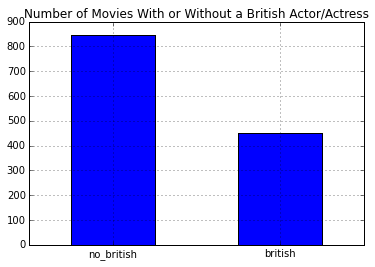

In [19]:
movie_df = pd.read_csv('dataframe.csv')
movie_df['British'] = movie_df['British'].astype(str)
movie_df.fillna(0, inplace=True)

brit_df = pd.DataFrame(movie_df.British.value_counts().values, index=['no_british', 'british'])
brit_df.plot(kind='bar', rot=0, legend=False, title='Number of Movies With or Without a British Actor/Actress')

X_movie = movie_df.values[:,(1,2,7)]
y_movie = movie_df.values[:,5]

movie_train, movie_test = train_test_split(movie_df)

X_train_movie, y_train_movie = movie_train[:,(1,2,7)], movie_train[:,5]
X_test_movie, y_test_movie = movie_test[:,(1,2,7)], movie_test[:,5]

# Add intercept
cons = np.ones(len(X_train_movie))
cons2 = np.ones(len(X_test_movie))
X_train_movie = np.insert(X_train_movie, 0, cons, axis=1)
X_test_movie = np.insert(X_test_movie, 0, cons2, axis=1)

# Logistic Regression
movie_log_model = LogisticRegression()
movie_log_model.fit(X_train_movie, y_train_movie)
acc_british = movie_log_model.score(X_test_movie, y_test_movie)
print 'Accuracy of Logistic Regression Predicting a British Actor: {0:.2f}'.format(acc_british)

# Knn Classifier
clf_movie = KNeighborsClassifier(n_neighbors = 10)
clf_movie.fit(X_train_movie, y_train_movie)
acc_clf = clf_movie.score(X_test_movie, y_test_movie)
print 'Accuracy of Knn = 10 Predicting a British Actor: {0:.2f}'.format(acc_clf)

# Stupid Predictor, i.e. just returns the most prevalent value in the prediction set
def most_present(array):
    return [array.argmax(axis=0)] * len(X_test_movie)
    
y_movie_stupid = most_present(movie_df.British.value_counts())
all_nb = sklearn.metrics.accuracy_score(y_test_movie, y_movie_stupid)
print 'Accuracy Setting Prediction to Most Prevalent Label: {0:.2f}'.format(all_nb)

### Challenge 12

In [31]:
def write_to_csv(filein, fileout): 
    with open(filein, 'r') as f:
     reader = csv.reader(f)
     data = open(fileout, 'w')
     writer = csv.writer(data)
     for row in reader:
         writer.writerow(row)
     data.close()
     
#write_to_csv('haberman.data', 'haberman.csv')
hab_columns = ['age', 'operation_year', 'num_positive_nodes', 'survival']
hab_df = pd.read_csv('haberman.csv', names=hab_columns)
     
avg_age = hab_df.age.mean()
std_age = hab_df.age.std()
print 'Average Age: {0:.2f}'.format(avg_age)
print 'Standard Deviation of Age: {0:.2f}\n'.format(std_age)

avg_age_lt5 = hab_df.age[hab_df['survival'] == 2].mean()
avg_age_gt5 = hab_df.age[hab_df['survival'] == 1].mean()
std_age_lt5 = hab_df.age[hab_df['survival'] == 2].std()
std_age_gt5 = hab_df.age[hab_df['survival'] == 1].std()
print 'Average Age of Patients Who Survived Fewer Than 5 Years After Surgery: {0:.2f}'.format(avg_age_lt5)
print 'Standard Deviation of Age of Patients Who Survived Fewer Than 5 Years After Surgery: {0:.2f}\n'.format(std_age_lt5)
print 'Average Age of Patients Who Survived 5 or More Years After Surgery: {0:.2f}'.format(avg_age_gt5)
print 'Standard Deviation of Age of Patients Who Survived 5 or More Years After Surgery: {0:.2f}'.format(std_age_gt5)

Average Age: 52.46
Standard Deviation of Age: 10.80

Average Age of Patients Who Survived Fewer Than 5 Years After Surgery: 53.68
Standard Deviation of Age of Patients Who Survived Fewer Than 5 Years After Surgery: 10.17

Average Age of Patients Who Survived 5 or More Years After Surgery: 52.02
Standard Deviation of Age of Patients Who Survived 5 or More Years After Surgery: 11.01


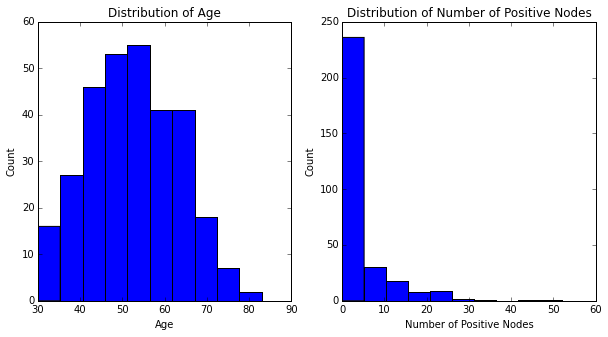

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(hab_df.age)
plt.xlabel('Age');
plt.ylabel('Count');
plt.title('Distribution of Age');
plt.subplot(1,2,2)
plt.hist(hab_df.num_positive_nodes)
plt.xlabel('Number of Positive Nodes');
plt.ylabel('Count');
plt.title('Distribution of Number of Positive Nodes');

In [37]:
earliest_year = int('19{0}'.format(hab_df.operation_year.min()))
recent_year = int('19{0}'.format(hab_df.operation_year.max()))
print 'Earliest year of surgery: {0}'.format(earliest_year)
print 'Most recent year of surgery: {0}'.format(recent_year)

Earliest year of surgery: 1958
Most recent year of surgery: 1969


In [40]:
hab_train, hab_test = train_test_split(hab_df)

X_hab_train = hab_train[:,:3]
cons = np.ones(len(X_hab_train))
# Add intercept
X_hab_train = np.insert(X_hab_train, 0, cons, axis=1)
y_hab_train = hab_train[:,3]
X_hab_test = hab_test[:,:3]
cons2 = np.ones(len(X_hab_test))
# Add intercept
X_hab_test = np.insert(X_hab_test, 0, cons2, axis=1)
y_hab_test = hab_test[:,3]

hab_log_model = LogisticRegression()
hab_log_model.fit(X_hab_train,y_hab_train)
acc_hab = hab_log_model.score(X_hab_test, y_hab_test)
print 'Survival Prediction After 5 Years: {0:.2f}'.format(acc_hab)

Survival Prediction After 5 Years: 0.82


In [44]:
print 'Intercept Coefficient: {0:.2f}'.format(hab_log_model.coef_[0][0])
print 'Age Coefficient: {0:.2f}'.format(hab_log_model.coef_[0][1])
print 'Operation Year Coefficient: {0:.2f}'.format(hab_log_model.coef_[0][2])
print 'Number of Positive Node Coefficient: {0:.2f}'.format(hab_log_model.coef_[0][3])

Intercept Coefficient: -0.14
Age Coefficient: 0.02
Operation Year Coefficient: -0.03
Number of Positive Node Coefficient: 0.07


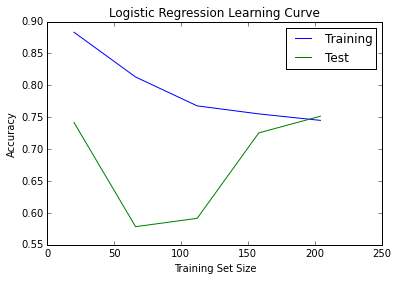

In [45]:
X_hab = hab_df.values[:,:3]
y_hab = hab_df.values[:,3]
hab_m, hab_train_error, hab_test_err = sklearn.learning_curve.learning_curve(hab_log_model, X_hab, y_hab)
hab_train_cv_error = np.mean(hab_train_error, axis=1)
hab_test_cv_error = np.mean(hab_test_err, axis=1)

plt.figure()
plt.plot(hab_m, hab_train_cv_error, label='Training') 
plt.plot(hab_m, hab_test_cv_error, label='Test')
plt.title('Logistic Regression Learning Curve')
plt.legend(loc='best')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')